### Imports section

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Loading the dataset

In [5]:
# Using pandas ro load the dataset remotely
df = pd.read_csv("https://raw.githubusercontent.com/yqian000/OnlineReviewDetection/main/reviews.csv")

### Explore the dataset

In [6]:
df.head(10)

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...
5,Home_and_Kitchen_5,3.0,CG,I WANTED DIFFERENT FLAVORS BUT THEY ARE NOT.
6,Home_and_Kitchen_5,5.0,CG,They are the perfect touch for me and the only...
7,Home_and_Kitchen_5,3.0,CG,These done fit well and look great. I love th...
8,Home_and_Kitchen_5,5.0,CG,"Great big numbers & easy to read, the only thi..."
9,Home_and_Kitchen_5,5.0,CG,My son loves this comforter and it is very wel...


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


In [22]:
df.isna().any()

category    False
rating      False
label       False
text_       False
dtype: bool

In [113]:
df.groupby("label").label.count()

label
CG    20216
OR    20216
Name: label, dtype: int64

### Univariate plots   
#### category plot

In [114]:
category_groups = df.groupby("category").category.count()
category_groups

category
Books_5                         4370
Clothing_Shoes_and_Jewelry_5    3848
Electronics_5                   3988
Home_and_Kitchen_5              4056
Kindle_Store_5                  4730
Movies_and_TV_5                 3588
Pet_Supplies_5                  4254
Sports_and_Outdoors_5           3946
Tools_and_Home_Improvement_5    3858
Toys_and_Games_5                3794
Name: category, dtype: int64

In [55]:
category_index = category_groups.index
category_count = category_groups.values

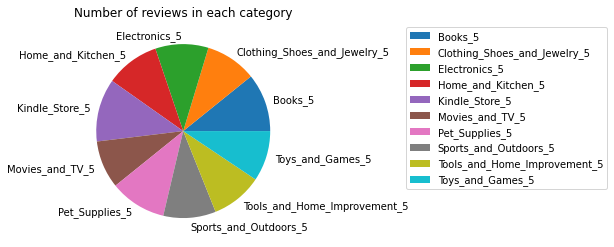

In [84]:
wedges,texts=plt.pie(category_count, labels = category_index)
plt.legend(wedges, category_index, bbox_to_anchor =(1.5, 0, 0, 1))
plt.title("Number of reviews in each category")
plt.show()

#### rating plot

In [92]:
df['rating'].describe()

count    40432.000000
mean         4.256579
std          1.144354
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: rating, dtype: float64

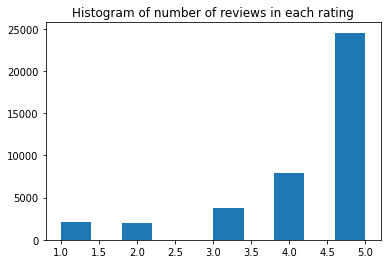

In [87]:
plt.title('Histogram of number of reviews in each rating')
plt.hist(df['rating'])
plt.show()

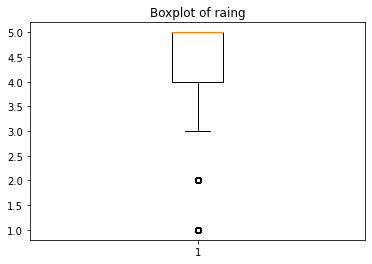

In [89]:
plt.title('Boxplot of raing')
plt.boxplot(df['rating'])
plt.show()

#### correlations between variables

In [103]:
# convert label to integers: CG = spam = 1, OR = not_spam = 0
df['y'] = (df['label'] == 'CG').apply(int)

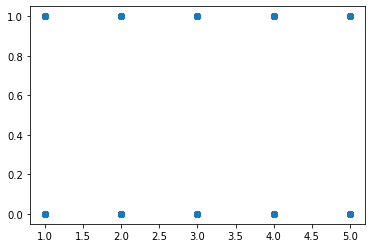

In [104]:
plt.scatter(df['rating'], y)

In [116]:
df.groupby(['category', 'rating']).mean()


y
category                     rating          
Books_5                      1.0     0.538922
                             2.0     0.559091
                             3.0     0.523909
                             4.0     0.487073
                             5.0     0.492702
Clothing_Shoes_and_Jewelry_5 1.0     0.522388
                             2.0     0.461224
                             3.0     0.488834
                             4.0     0.496420
                             5.0     0.505784
Electronics_5                1.0     0.492163
                             2.0     0.470588
                             3.0     0.492669
                             4.0     0.497333
                             5.0     0.505476
Home_and_Kitchen_5           1.0     0.496350
                             2.0     0.509901
                             3.0     0.513353
                             4.0     0.460972
                             5.0     0.508190
Kindle_Store_5               1.0     0.530000
                             2.0     0.503268
                             3.0     0.527964
                             4.0     0.504967
                             5.0     0.492204
Movies_and_TV_5              1.0     0.473684
                             2.0     0.486111
                             3.0     0.513228
                             4.0     0.472973
                             5.0     0.511846
Pet_Supplies_5               1.0     0.483221
                             2.0     0.495690
                             3.0     0.513784
                             4.0     0.495562
                             5.0     0.501321
Sports_and_Outdoors_5        1.0     0.458763
                             2.0     0.453488
                             3.0     0.542169
                             4.0     0.500000
                             5.0     0.500797
Tools_and_Home_Improvement_5 1.0     0.523148
                             2.0     0.429379
                             3.0     0.521311
                             4.0     0.504464
                             5.0     0.499196
Toys_and_Games_5             1.0     0.430380
                             2.0     0.520548
                             3.0     0.517906
                             4.0     0.493525
                             5.0     0.502467